In [43]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
# setting the decimal values 
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [44]:
# Importing the data
df = pd.read_csv("D:/Data Analyst/Masai_Unit_3/assignments/loan_data.csv")
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.12,829.10,11.35,19.48,737,5639.96,28854,52.10,0,0,0,0
1,1,credit_card,0.11,228.22,11.08,14.29,707,2760.00,33623,76.70,0,0,0,0
2,1,debt_consolidation,0.14,366.86,10.37,11.63,682,4710.00,3511,25.60,1,0,0,0
3,1,debt_consolidation,0.10,162.34,11.35,8.10,712,2699.96,33667,73.20,1,0,0,0
4,1,credit_card,0.14,102.92,11.30,14.97,667,4066.00,4740,39.50,0,1,0,0


In [ ]:
# Dataset Overview -
'''
- credit.policy ---> meeting credit policy creteria or not (0/1)
- purpose ---> Reason for the credit
- int.rate ---> interest rate on the credit amount
- installment ---> monthly payment amount for the credit amount
- log.annual.inc ---> logarithm of the borrower’s annual income
- dti ---> debt to income ratio, the ratio of monthly debt payments to monthly income
- fico ---> measure for creditworthiness
- days.with.cr.line ---> days the borrower has a credit line
- revol.bal ---> borrower’s revolving balance, the amount of debt currently carried
- revol.util ---> Revolving line utilization rate, the percentage of the credit limit used by the borrower
- inq.last.6mths --> number of inquiries made by creditors in last 6 months
- delinq.2yrs ---> number of times borrower has 30+ days past due payment in last 2 yrs
- pub.rec ---> number of derogatory public records 
- not.fully.paid ---> indicator for borrower has fully paid the loan or not

'''

In [45]:
# Checking for data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [46]:
# Checking for missing values
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [ ]:
# There is no missing values in the data

In [47]:
# Statistics Description -
df[['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util']].describe()

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util
count,9578.00,9578.00,9578.00,9578.00,9578.00,9578.00,9578.00,9578.00
mean,0.12,319.09,10.93,12.61,710.85,4560.77,16913.96,46.80
std,0.03,207.07,0.61,6.88,37.97,2496.93,33756.19,29.01
min,0.06,15.67,7.55,0.00,612.00,178.96,0.00,0.00
25%,0.10,163.77,10.56,7.21,682.00,2820.00,3187.00,22.60
50%,0.12,268.95,10.93,12.66,707.00,4139.96,8596.00,46.30
75%,0.14,432.76,11.29,17.95,737.00,5730.00,18249.50,70.90
max,0.22,940.14,14.53,29.96,827.00,17639.96,1207359.00,119.00


In [ ]:
'''
- For interest rate, mean interest = 12%, median interest = 12%, indicating symmetrical distribution,
and standard deviation interest = 3%, indicating most of the rates vary by 3% above or below mean value.
- For installments, average monthly installment = 319 approx, median = 268, indicating right skewed data, having some outliers,
ans STD installments = 207, indicating wide range of installments availability due to credit limit varies.
- For annual income, average log annual income = 10.93, median = 10.93, indicating symmetrical distribution,
std = 0.6, indicating not much variations in the annual income
- For DTI Ratio, average debt-to-income ratio = 12.6, median = 12.6 approx, and std = 6.8 approx, 
indicating moderate to high variations
- For fico, average credit score = 710, median = 707, slightly right skewed data, std = 37.97, indiacting low-moderate range.
- For days with credit line, mean credit line = 4560 days, median = 4139 days, indicating positively skewed, std = 2496,
indiacting wide range of credit line days varies from the mean days.
- For revolving balance, mean = 16913, median = 8596, results in right skewed data, indicating outliers with high balances,
std = 33756 approx, indicating high data points variation from the mean.
- For Revolving utilization, mean = 46, median = 46, indicating symmetrical distribution, std = 29, 
indicating moderate to high variability on the amounts.

'''

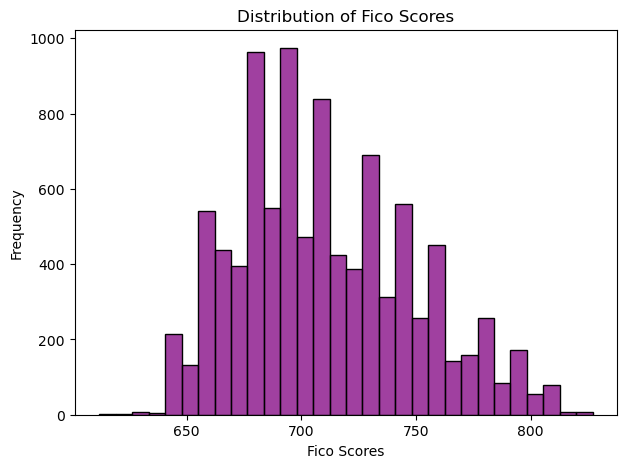

In [48]:
# Distribution of Fico scores amoung borrowers
plt.figure(figsize = (7,5))
sns.histplot(x = 'fico', bins = 30, kde = False, data = df, color = 'purple')
plt.title('Distribution of Fico Scores')
plt.xlabel('Fico Scores')
plt.ylabel('Frequency')
plt.show()

In [ ]:
'''
- Majority of the borrowers creditwothiness lies between 680 and 750 approx, 
also having some outliers indicating low credit scores below 650 and very high credit score above 800

'''

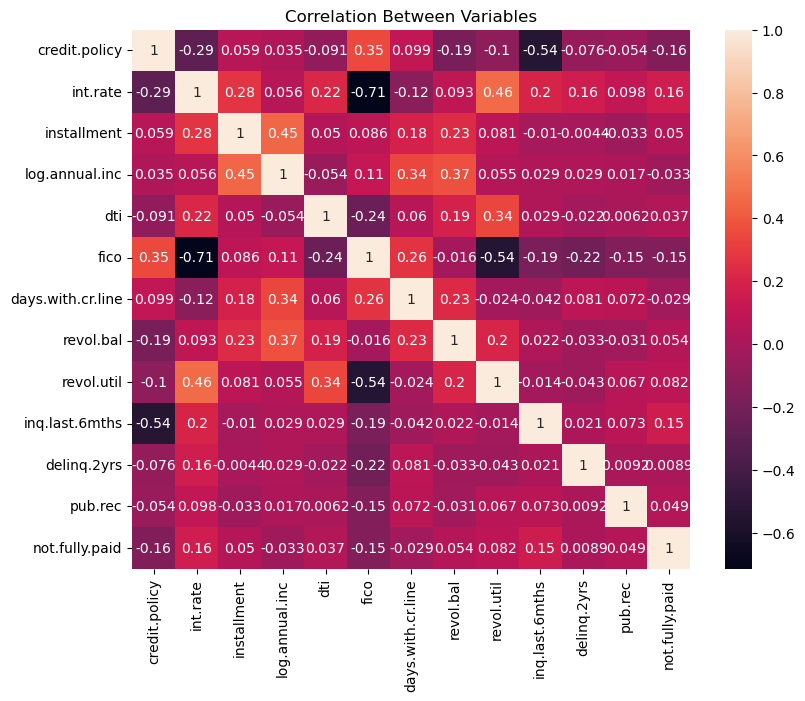

In [49]:
# Correlation Analysis with Interest Rate
plt.figure(figsize = (9,7))
sns.heatmap(df.corr(numeric_only = True), annot = True)
plt.title('Correlation Between Variables')
plt.show()

In [ ]:
'''
- interest rate have strongly negative correlation with fico scores, as fico scores decreases, interest rate increases.
- interest rate have strong positive correlation with revolving utilisation line , indicating as percentage of credit limit
usage increases the interest rate also increases.

'''

In [100]:
# Credit Policy Compliance
df.groupby(['credit.policy','purpose'])[['int.rate', 'log.annual.inc', 'dti', 'fico', 'delinq.2yrs','pub.rec']].mean()

int.rate  log.annual.inc   dti   fico  \
credit.policy purpose                                                     
0             all_other               0.13           10.78 12.04 688.21   
              credit_card             0.14           11.05 15.35 681.09   
              debt_consolidation      0.14           10.87 15.65 678.35   
              educational             0.14           10.36 11.24 680.43   
              home_improvement        0.14           11.19 13.01 690.59   
              major_purchase          0.13           10.60 10.27 688.14   
              small_business          0.15           11.36 12.49 700.10   
1             all_other               0.11           10.86 10.82 722.68   
              credit_card             0.12           11.05 13.80 716.40   
              debt_consolidation      0.12           10.92 13.72 709.68   
              educational             0.11           10.62 11.38 718.04   
              home_improvement        0.11           11.21  9.56 732.62   
              major_purchase          0.11           10.89 10.14 728.62   
              small_business          0.14           11.09 10.37 724.97   

                                  delinq.2yrs  pub.rec  
credit.policy purpose                                   
0             all_other                  0.28     0.06  
              credit_card                0.19     0.12  
              debt_consolidation         0.27     0.11  
              educational                0.19     0.06  
              home_improvement           0.14     0.10  
              major_purchase             0.32     0.08  
              small_business             0.24     0.07  
1             all_other                  0.15     0.04  
              credit_card                0.14     0.06  
              debt_consolidation         0.14     0.06  
              educational                0.15     0.04  
              home_improvement           0.14     0.06  
              major_purchase             0.15     0.04  
              small_business             0.13     0.05

In [ ]:
'''
- credit policy compliance mostly varies due to several reasons such as low fico scores, occurances of public records,
recors of payment past due in 2 years, overall affecting policy compliance, having high debt to income ratio.

'''

In [62]:
# Purpose of loan
df['purpose'].value_counts()  

purpose
debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: count, dtype: int64

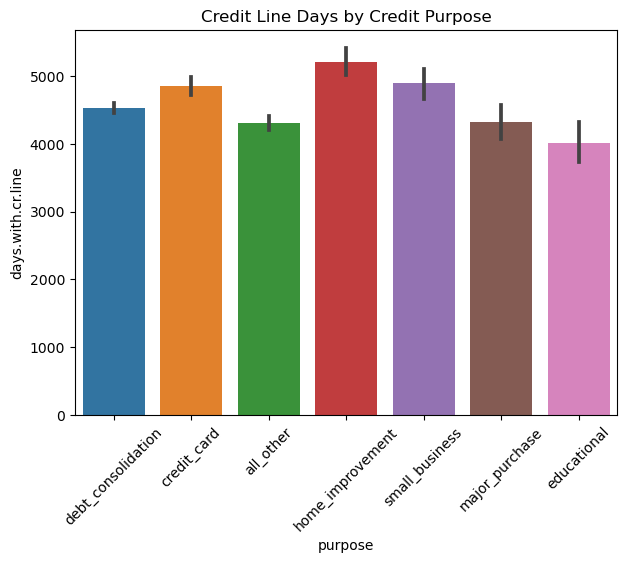

In [68]:
# Credit line days variation by each purpose
plt.figure(figsize = (7,5))
sns.barplot(x = 'purpose', y = 'days.with.cr.line', data = df)
plt.title('Credit Line Days by Credit Purpose')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
'''
- Common credit purpose is debt consolidation
- High credit line days occurs mostly house improvements and small business

'''

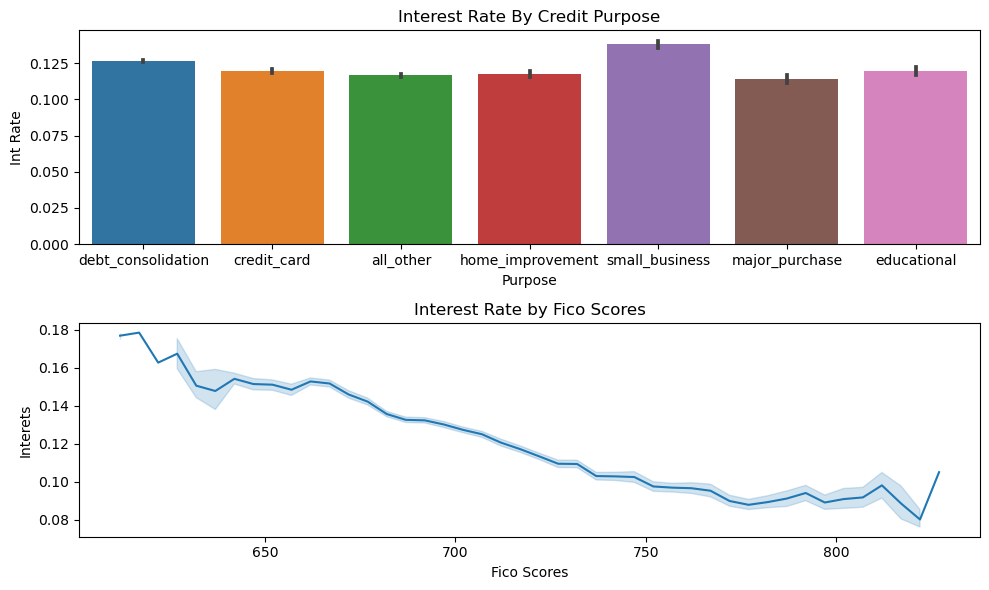

In [91]:
# Interest Rate Variation By Purpose and fico scores
fig, ax = plt.subplots(2,1, figsize = (10,6))

sns.barplot(x = 'purpose', y ='int.rate', data = df, ax = ax[0])
ax[0].set_title('Interest Rate By Credit Purpose')
ax[0].set_ylabel('Int Rate')
ax[0].set_xlabel('Purpose')


sns.lineplot(x = 'fico', y ='int.rate', data = df, ax = ax[1])
ax[1].set_title('Interest Rate by Fico Scores')
ax[1].set_xlabel('Fico Scores')
ax[1].set_ylabel('Interets')


plt.tight_layout()
plt.show()

In [ ]:
'''
- There is high interest for small businesses, followed by debt consolidation
- Interest rate decreases for high fico scores, indicating the high creditworthiness, the low is the interest rate.

'''

In [133]:
# Income Analysis

# Annual Income and installment amount
revol_balance = df.groupby('log.annual.inc')['installment'].mean().reset_index()
revol_balance = revol_balance.sort_values( by = 'installment', ascending = False).reset_index(drop = True)
revol_balance


,log.annual.inc,installment
0,12.57,940.14
1,11.59,926.83
2,12.74,907.60
3,11.69,902.54
4,12.71,900.53
...,...,...
1982,12.21,30.02
1983,10.08,21.59
1984,8.98,16.31
1985,7.60,15.91


In [ ]:
'''
- As the high income, increases the installment amount as well, highest installment recorded for 12.57 log.annual.inc

'''

In [149]:
# Annual income and purpose
purpose = pd.pivot_table(df, index = 'log.annual.inc', columns = 'purpose', aggfunc = 'size', fill_value = 0)
purpose_long = purpose.stack().reset_index(name = 'count')
purpose_long.sort_values(by ='count', ascending = False).reset_index(drop = True)

,log.annual.inc,purpose,count
0,11.00,debt_consolidation,131
1,10.60,debt_consolidation,108
2,10.71,debt_consolidation,106
3,10.82,debt_consolidation,100
4,10.31,debt_consolidation,93
...,...,...,...
13904,10.77,home_improvement,0
13905,10.77,major_purchase,0
13906,10.77,small_business,0
13907,10.77,all_other,0


In [ ]:
'''
- Highest Purpose count was for debt consolidation for mostly log.annual.inc having 11.00

'''

In [140]:
# Annual income and interest rate
interest = df.groupby('log.annual.inc')['int.rate'].mean()*100
interest = interest.reset_index()
interest = interest.sort_values(by = 'int.rate', ascending = False).reset_index(drop = True)
interest

,log.annual.inc,int.rate
0,11.38,21.21
1,11.55,20.86
2,12.57,20.86
3,11.69,20.86
4,11.59,19.82
...,...,...
1982,10.28,6.76
1983,9.55,6.76
1984,10.53,6.00
1985,9.79,6.00


In [ ]:
'''
- Highest interest rate recorded for log.annual.inc 11.38 followed by the 11.55

'''

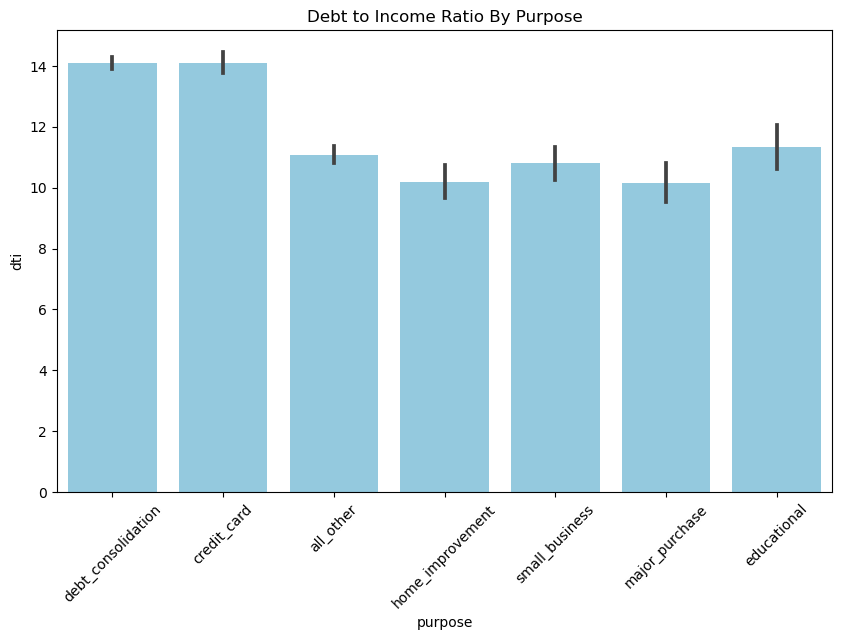

In [98]:
# Debt to Income Ratio
plt.figure(figsize = (10,6))
sns.barplot(x = 'purpose', y = 'dti', data = df, color = 'skyblue')
plt.title('Debt to Income Ratio By Purpose')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
'''
- DTI are generally very high ratio in debt consolidationa and credit card purposes, indicating larger portion of income
paid for debt, can be red flag, as borrowers are financial strained.

'''

In [115]:
# Delinquency Patterns
Delinquency = pd.pivot_table(df, index = 'fico', columns = 'delinq.2yrs', aggfunc = 'size', fill_value = 0)
Delinquency

delinq.2yrs,0,1,2,3,4,5,6,7,8,11,13
fico,,,,,,,,,,,
612,1,1,0,0,0,0,0,0,0,0,0
617,1,0,0,0,0,0,0,0,0,0,0
622,1,0,0,0,0,0,0,0,0,0,0
627,2,0,0,0,0,0,0,0,0,0,0
632,5,1,0,0,0,0,0,0,0,0,0
637,4,1,0,0,0,0,0,0,0,0,0
642,77,15,7,1,1,0,0,0,0,0,1
647,85,15,7,3,1,0,0,0,0,1,0
652,84,22,14,4,4,2,0,0,1,0,0


In [ ]:
'''
- Mostly occurances of Delinquency lies between the 640 -700 fico scores, indicating the credit isssue with the mentioned 
fico scores range.

'''

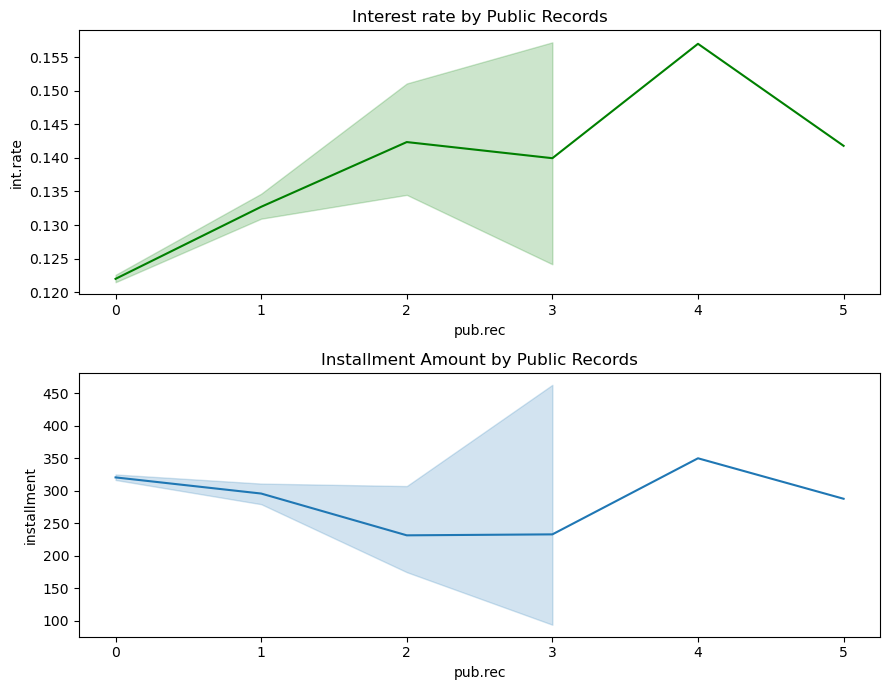

In [156]:
# Public Record Analysis -
fig, ax = plt.subplots(2,1, figsize = (9,7))

# Public Record and Interest Rate
sns.lineplot(x = 'pub.rec', y = 'int.rate', data = df, ax = ax[0], color = 'green')
ax[0].set_title('Interest rate by Public Records')

# Public Record and Loan installment amount
sns.lineplot(x = 'pub.rec', y = 'installment', data = df, ax = ax[1])
ax[1].set_title('Installment Amount by Public Records')

plt.tight_layout()
plt.show()


In [ ]:
'''
- The interest rate significantly increases till pub.rec is 2 them slightly decreases and increases during 3-4 significatley.
- The installment loan amounts slow phase decreases till 2 and stable around 3 then significantly increases in
pub.rec 4.
- public record 4 having high installment as well interest rate, indicating 3-4 as huge impact on interest and installment.

'''